<a href="https://colab.research.google.com/github/emuyxie/Investigating-time-series-causality/blob/master/Copy_of_MultiLabel_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
#skip
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

     |████████████████████████████████| 194kB 4.1MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 


In [ ]:
from fastai.vision.all import *

## Set up Data

In [ ]:
!wget http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip

--2020-10-15 06:44:27--  http://weegee.vision.ucmerced.edu/datasets/UCMerced_LandUse.zip
Resolving weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)... 169.236.184.65
Connecting to weegee.vision.ucmerced.edu (weegee.vision.ucmerced.edu)|169.236.184.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 332468434 (317M) [application/zip]
Saving to: ‘UCMerced_LandUse.zip’

UCMerced_LandUse.zi 100%[===================>] 317.07M  99.5MB/s    in 5.1s    

2020-10-15 06:44:32 (62.3 MB/s) - ‘UCMerced_LandUse.zip’ saved [332468434/332468434]



In [ ]:
!unzip UCMerced_LandUse.zip

In [ ]:
path = Path("/content/UCMerced_LandUse/Images")
items = get_image_files(path)
items

(#2100) [Path('/content/UCMerced_LandUse/Images/overpass/overpass78.tif'),Path('/content/UCMerced_LandUse/Images/overpass/overpass07.tif'),Path('/content/UCMerced_LandUse/Images/overpass/overpass47.tif'),Path('/content/UCMerced_LandUse/Images/overpass/overpass44.tif'),Path('/content/UCMerced_LandUse/Images/overpass/overpass56.tif'),Path('/content/UCMerced_LandUse/Images/overpass/overpass94.tif'),Path('/content/UCMerced_LandUse/Images/overpass/overpass75.tif'),Path('/content/UCMerced_LandUse/Images/overpass/overpass37.tif'),Path('/content/UCMerced_LandUse/Images/overpass/overpass31.tif'),Path('/content/UCMerced_LandUse/Images/overpass/overpass71.tif')...]

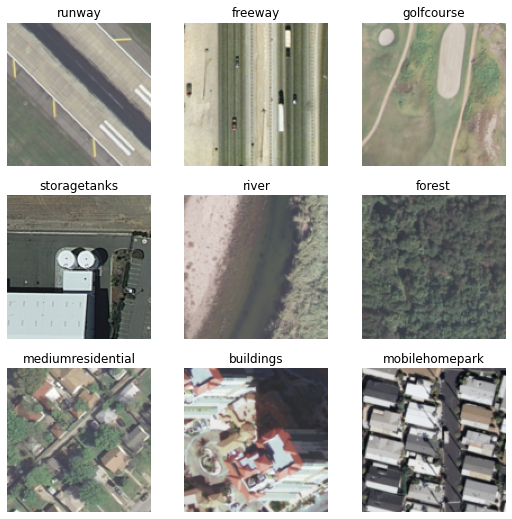

In [ ]:
data = DataBlock(blocks=(ImageBlock, CategoryBlock),  get_items=get_image_files,  splitter=RandomSplitter(valid_pct=0.3, seed=42), get_y=parent_label, item_tfms=Resize(128))
dls = data.dataloaders(path, item_tfms=Resize(128))
dls.valid.show_batch()

## Train Deep learning Model (Transfer Learning)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,3.166090,0.799340,0.260317,01:36


epoch,train_loss,valid_loss,error_rate,time
0,0.909082,0.499987,0.158730,02:13
1,0.537120,0.312348,0.092063,02:12
2,0.333088,0.297569,0.095238,02:13
3,0.214019,0.264252,0.079365,02:13
4,0.146090,0.265749,0.079365,02:11


## Interpretation

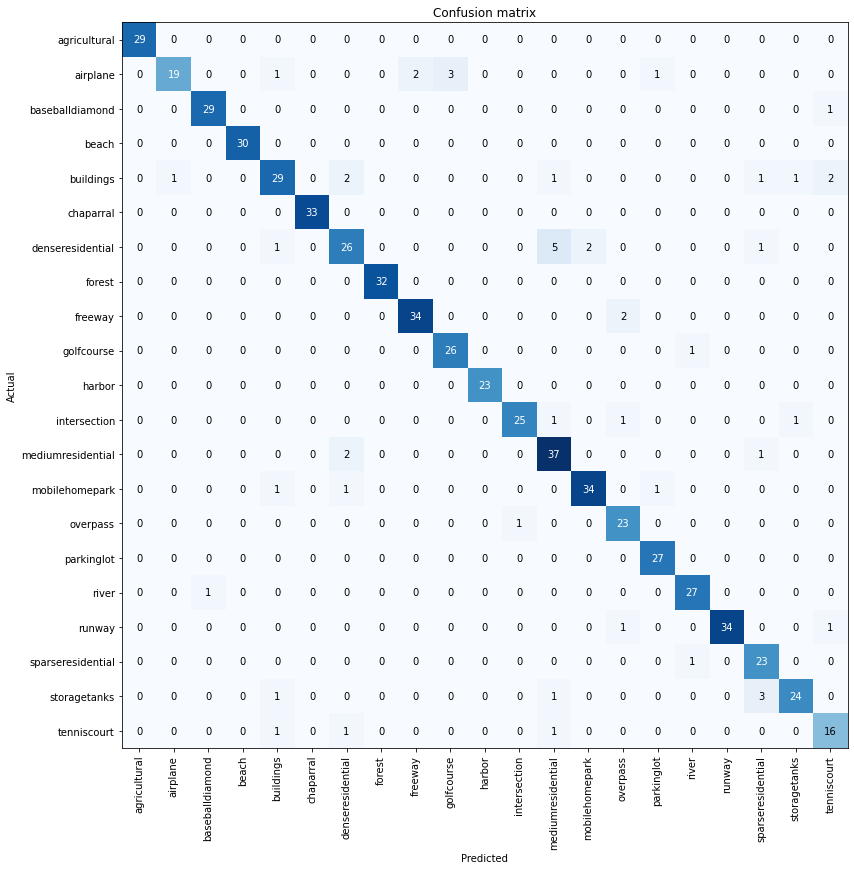

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12))

## Inference

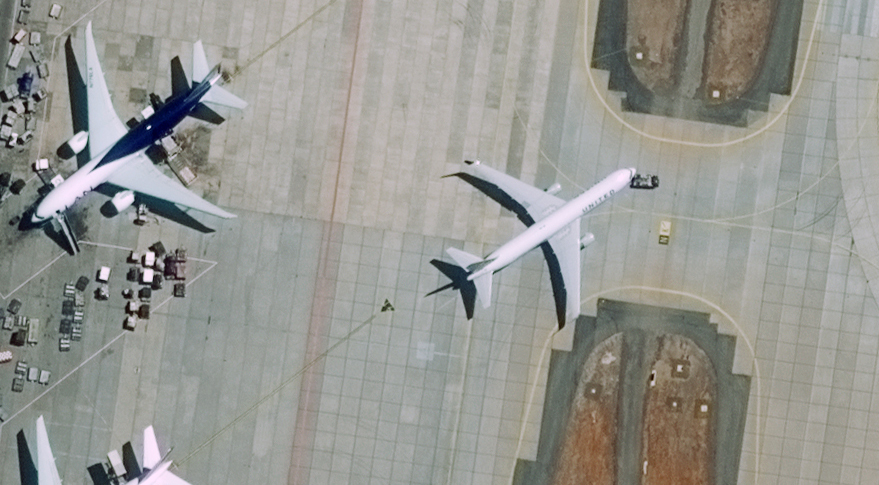



In [ ]:
![title](img/picture.png)

In [ ]:
learn.predict("/content/30_centimeter_satellite_imagery_CHL_Santiago_Airport_1.jpg")[0]

'airplane'